In [1]:
# Sample API
import flowx
import simulation

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

# Define cell-centered variable names
center_vars = ['asol', 'ivar', 'rvar', 'eror']
poisson_vars = ['ivar', 'rvar']

simulation_info = dict(verbose = True, poisson_solver = 'superlu')

# Define boundary condition for the poisson test
user_bc = 'dirichlet'

# Define boundary conditions for variable ivar
bc_type = dict(ivar = [user_bc, user_bc, user_bc, user_bc])
bc_val  = dict(ivar = [0.0, 0.0, 0.0, 0.0])

domain_data_struct = flowx.domain.Domain(nx, ny, xmin, xmax, ymin, ymax,
                                         center_vars, bc_type_center=bc_type, bc_val_center=bc_val)

grid = domain_data_struct[0]

poisson = flowx.poisson.Poisson(grid, poisson_vars, simulation_info)

In [3]:
# Compute the analytical solution 
simulation.get_analytical(grid, 'asol', user_bc)

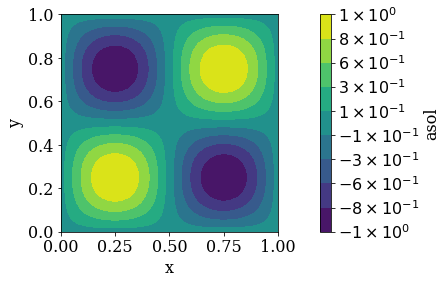

In [4]:
# Plot the analytical solution
flowx.io.plot_contour(grid, 'asol')

In [5]:
# Calculate the right-hand side of the Poisson system
simulation.get_rhs(grid, 'rvar', user_bc)

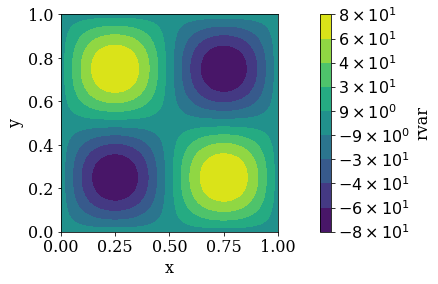

In [6]:
# Plot the right-hand side of the Poisson system
flowx.io.plot_contour(grid, 'rvar')

In [7]:
# Solve the Poisson system
ites, res = poisson.solve()

LU Decomposition:
- Final residual: 2.020730180406078e-11


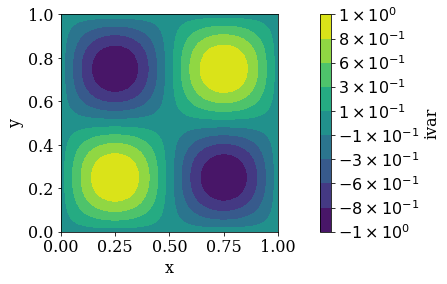

In [8]:
# Plot the numerical solution
flowx.io.plot_contour(grid, 'ivar')

In [9]:
# Compute the error (absolute value of the difference)
grid.compute_error('eror', 'ivar', 'asol')

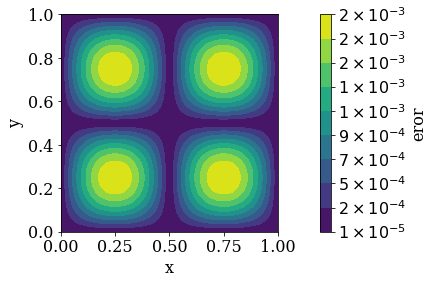

In [10]:
flowx.io.plot_contour(grid, 'eror')

In [11]:
# Compute the L2-norm of the error
l2_norm = grid.get_l2_norm('eror')
l2_norm

2.3355715072106937e-05